In [1]:
# 파이썬 및 라이브러리 버전 확인 + 검증
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

In [2]:
# assert [조건], [오류메시지]
# [조건] : 이 조건이 True이면 그대로 코드가 진행되고, False라면 AssertionError가 발생합니다. 
# [오류메시지] : 앞에 조건이 False인 경우 "AssertionError와 함께 남길 메시지" 입니다. 이 부분은 생략이 가능합니다. 
name = "2BlockDMask"
assert name[0].isalpha(), "이름의 맨 처음은 알파벳으로 시작해주세요"

AssertionError: 이름의 맨 처음은 알파벳으로 시작해주세요

In [3]:
# Jupyer notebook을 실행한 브라우저에서 그림을 볼 수 있도록,
# 브라우저 내부(Inline)에 그려지도록 하는 코드
%matplotlib inline

import matplotlib as mpl

# Runtime Configuration Parameters, 줄여서 rcParams라는 딕셔너리의 값을 이용해서 그림
# rc를 통해 mpl 세부 사항 설정
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [4]:
mpl.rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': ['-layers', 'OptimizePlus'],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': False,
          'axes.grid.axis': 'both',
   

In [5]:
# 학습이 필요한 라이브러리 가져오기
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [14]:
import os
import pathlib

# 그래프 저장 디렉토리 지정
# /Users/kjs/Desktop/hands_on_ml
MAIN_DIR = pathlib.Path(os.getcwd()).resolve().parent.parent
CHAPTER_ID = "ch_01"
GRAPH_ROOT_DIR = pathlib.Path.joinpath(MAIN_DIR, "data", "graphs", CHAPTER_ID)
os.makedirs(GRAPH_ROOT_DIR, exist_ok=True)

# 그래프 저장 함수 선언
# tight_layout : 자동으로 명시된 여백(padding)에 관련된 서브플롯 파라미터를 조정
# DPI : Dot Per Inch, 인치 안에 몇개의 점이 구성되도록 할 것인지 설정(해상도)
def save_fig(fig_id, tight_layout=True, fig_extension="png", resoultion=300):
    path = pathlib.Path.joinpath(GRAPH_ROOT_DIR, fig_id + "." + fig_extension)
    print("Saving Figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resoultion)

In [15]:
# 실행할 때 동일한 결과가 나오도록 무작위 함수들의 시드를 지정
np.random.seed(42)

In [17]:
# 국가별 1인당 GDP 데이터

datapath = "https://raw.githubusercontent.com/codingalzi/handson-ml2/master/notebooks/datasets/lifesat/"

In [20]:
# thousands : Character acting as the thousands separator in numerical values. 
# delimiter : Alias for sep
# na_values : Additional strings to recognize as NA/NaN
gdp_per_capita = pd.read_csv(datapath+"gdp_per_capita.csv",
                             thousands =',',
                             delimiter='\t',
                             encoding='latin1',
                             na_values="n/a")

gdp_per_capita

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
3,Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
4,Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0
...,...,...,...,...,...,...,...
185,Vietnam,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",2088.344,2012.0
186,Yemen,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",1302.940,2008.0
187,Zambia,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",1350.151,2010.0
188,Zimbabwe,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",1064.350,2012.0


In [24]:
# inplace : 기존의 데이터 프레임에 적용 유무
gdp_per_capita.set_index("Country", inplace=True)

gdp_per_capita.head()

,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
Country,,,,,,
Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0


In [125]:
gdp_per_capita.rename(columns={"2015" : "GDP per capita"}, inplace=True)

gdp_per_capita.head()

,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per Capita,Estimates Start After
Country,,,,,,
Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0


In [105]:
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')

In [106]:
oecd_bli.shape

(3292, 17)

In [107]:
oecd_bli.head()

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.1,E,Estimated value
1,AUT,Austria,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.0,NaN,NaN
2,BEL,Belgium,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,2.0,NaN,NaN
3,CAN,Canada,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.2,NaN,NaN
4,CZE,Czech Republic,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.9,NaN,NaN


In [108]:
oecd_bli.Indicator.unique()

array(['Dwellings without basic facilities', 'Housing expenditure',
       'Rooms per person', 'Household net adjusted disposable income',
       'Household net financial wealth', 'Employment rate',
       'Job security', 'Long-term unemployment rate', 'Personal earnings',
       'Quality of support network', 'Educational attainment',
       'Student skills', 'Years in education', 'Air pollution',
       'Water quality', 'Consultation on rule-making', 'Voter turnout',
       'Life expectancy', 'Self-reported health', 'Life satisfaction',
       'Assault rate', 'Homicide rate',
       'Employees working very long hours',
       'Time devoted to leisure and personal care'], dtype=object)

In [109]:
oecd_bli.Indicator.unique().shape

(24,)

In [110]:
oecd_bli.Indicator.shape

(3292,)

In [111]:
'Life satisfaction' in oecd_bli.Indicator.unique()

True

In [112]:
oecd_bli.Indicator

0              Dwellings without basic facilities
1              Dwellings without basic facilities
2              Dwellings without basic facilities
3              Dwellings without basic facilities
4              Dwellings without basic facilities
                          ...                    
3287    Time devoted to leisure and personal care
3288    Time devoted to leisure and personal care
3289    Time devoted to leisure and personal care
3290    Time devoted to leisure and personal care
3291    Time devoted to leisure and personal care
Name: Indicator, Length: 3292, dtype: object

In [113]:
mask = oecd_bli.Indicator == 'Life satisfaction'

# print(mask)
print(oecd_bli[mask].shape)
# print(oecd_bli[mask])
oecd_bli[mask]

(179, 17)


,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
2669,AUS,Australia,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,units,NaN,NaN,7.3,NaN,NaN
2670,AUT,Austria,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,units,NaN,NaN,6.9,NaN,NaN
2671,BEL,Belgium,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,units,NaN,NaN,6.9,NaN,NaN
2672,CAN,Canada,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,units,NaN,NaN,7.3,NaN,NaN
2673,CZE,Czech Republic,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,units,NaN,NaN,6.5,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2843,CHL,Chile,SW_LIFS,Life satisfaction,L,Value,LW,Low,AVSCORE,Average score,0,units,NaN,NaN,6.0,NaN,NaN
2844,EST,Estonia,SW_LIFS,Life satisfaction,L,Value,LW,Low,AVSCORE,Average score,0,units,NaN,NaN,5.1,NaN,NaN
2845,RUS,Russia,SW_LIFS,Life satisfaction,L,Value,LW,Low,AVSCORE,Average score,0,units,NaN,NaN,5.4,NaN,NaN
2846,SVN,Slovenia,SW_LIFS,Life satisfaction,L,Value,LW,Low,AVSCORE,Average score,0,units,NaN,NaN,5.0,NaN,NaN


In [114]:
oecd_bli.INEQUALITY.unique()

array(['TOT', 'MN', 'WMN', 'HGH', 'LW'], dtype=object)

In [115]:
arr1 = oecd_bli.INEQUALITY.unique()

sum = 0
for ineq in arr1:
    num_lines = (oecd_bli['INEQUALITY'] == ineq).sum()
    sum += num_lines
    print(f"{ineq:>3}:\t{num_lines}행")

print(f"\n 총: \t{sum}행")

TOT:	888행
 MN:	881행
WMN:	881행
HGH:	328행
 LW:	314행

 총: 	3292행


In [116]:
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"] == "TOT"]

In [117]:
oecd_bli.shape

(888, 17)

In [118]:
oecd_bli

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.10,E,Estimated value
1,AUT,Austria,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.00,NaN,NaN
2,BEL,Belgium,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,2.00,NaN,NaN
3,CAN,Canada,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.20,NaN,NaN
4,CZE,Czech Republic,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.90,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3213,EST,Estonia,WL_TNOW,Time devoted to leisure and personal care,L,Value,TOT,Total,HOUR,Hours,0,units,NaN,NaN,14.90,NaN,NaN
3214,ISR,Israel,WL_TNOW,Time devoted to leisure and personal care,L,Value,TOT,Total,HOUR,Hours,0,units,NaN,NaN,14.48,E,Estimated value
3215,RUS,Russia,WL_TNOW,Time devoted to leisure and personal care,L,Value,TOT,Total,HOUR,Hours,0,units,NaN,NaN,14.97,E,Estimated value
3216,SVN,Slovenia,WL_TNOW,Time devoted to leisure and personal care,L,Value,TOT,Total,HOUR,Hours,0,units,NaN,NaN,14.62,NaN,NaN


In [119]:
# pivot : Indicator의 항목에 대한 각 국가별 수치를 추출하기 위해
# Country 열의 항목을 행의 인덱스 이름, Indicator 항목을 열의 인덱스 이름으로 사용
oecd_bli_p = oecd_bli.pivot(index="Country", columns="Indicator", values="Value") 

In [120]:
oecd_bli_p

Indicator,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Long-term unemployment rate,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,13.0,2.1,10.5,1.1,76.0,14.02,72.0,0.8,31588.0,47657.0,...,1.08,50449.0,92.0,2.3,85.0,512.0,14.41,93.0,91.0,19.4
Austria,27.0,3.4,7.1,1.0,83.0,7.61,72.0,0.4,31173.0,49887.0,...,1.19,45199.0,89.0,1.6,69.0,500.0,14.46,75.0,94.0,17.0
Belgium,21.0,6.6,4.5,2.0,72.0,4.57,62.0,1.1,28307.0,83876.0,...,3.88,48082.0,94.0,2.2,74.0,509.0,15.71,89.0,87.0,18.9
Brazil,18.0,7.9,4.0,6.7,45.0,10.41,67.0,25.5,11664.0,6844.0,...,1.97,17177.0,90.0,1.6,69.0,402.0,14.97,79.0,72.0,16.3
Canada,15.0,1.3,10.5,0.2,89.0,3.94,72.0,1.5,29365.0,67913.0,...,0.90,46911.0,92.0,2.5,89.0,522.0,14.25,61.0,91.0,17.2
Chile,46.0,6.9,2.0,9.4,57.0,15.42,62.0,4.4,14533.0,17733.0,...,1.59,22101.0,86.0,1.2,59.0,436.0,14.41,49.0,73.0,16.5
Czech Republic,16.0,2.8,6.8,0.9,92.0,6.98,68.0,0.8,18404.0,17299.0,...,3.12,20338.0,85.0,1.4,60.0,500.0,14.98,59.0,85.0,18.1
Denmark,15.0,3.9,7.0,0.9,78.0,2.03,73.0,0.3,26491.0,44488.0,...,1.78,48347.0,95.0,1.9,72.0,498.0,16.06,88.0,94.0,19.4
Estonia,9.0,5.5,3.3,8.1,90.0,3.30,68.0,4.8,15167.0,7680.0,...,3.82,18944.0,89.0,1.5,54.0,526.0,14.90,64.0,79.0,17.5


In [121]:
# loc : 특정 행(row), 열(column)을 골라낼 때 사용
oecd_bli_p.loc['Korea']

Indicator
Air pollution                                   30.00
Assault rate                                     2.10
Consultation on rule-making                     10.40
Dwellings without basic facilities               4.20
Educational attainment                          82.00
Employees working very long hours               18.72
Employment rate                                 64.00
Homicide rate                                    1.10
Household net adjusted disposable income     19510.00
Household net financial wealth               29091.00
Housing expenditure                             16.00
Job security                                     3.20
Life expectancy                                 81.30
Life satisfaction                                5.80
Long-term unemployment rate                      0.01
Personal earnings                            36354.00
Quality of support network                      72.00
Rooms per person                                 1.40
Self-reported heal

In [122]:
oecd_bli_p["Life satisfaction"]

Country
Australia          7.3
Austria            6.9
Belgium            6.9
Brazil             7.0
Canada             7.3
Chile              6.7
Czech Republic     6.5
Denmark            7.5
Estonia            5.6
Finland            7.4
France             6.5
Germany            7.0
Greece             4.8
Hungary            4.9
Iceland            7.5
Ireland            7.0
Israel             7.4
Italy              6.0
Japan              5.9
Korea              5.8
Luxembourg         6.9
Mexico             6.7
Netherlands        7.3
New Zealand        7.3
Norway             7.4
OECD - Total       6.6
Poland             5.8
Portugal           5.1
Russia             6.0
Slovak Republic    6.1
Slovenia           5.7
Spain              6.5
Sweden             7.2
Switzerland        7.5
Turkey             5.6
United Kingdom     6.8
United States      7.2
Name: Life satisfaction, dtype: float64

In [126]:
# GDP 데이터는 OECD 회원국 이상의 국가 데이터 포함 -> OECD 회원극으로 제한하여 GDP와 삶의 만족도 사이에 관계 파악
oecd_country_stats = pd.merge(left=gdp_per_capita['GDP per Capita'],
                              right=oecd_bli_p['Life satisfaction'],
                              left_index=True, right_index=True)

oecd_country_stats

,GDP per Capita,Life satisfaction
Country,,
Australia,50961.865,7.3
Austria,43724.031,6.9
Belgium,40106.632,6.9
Brazil,8669.998,7.0
Canada,43331.961,7.3
Chile,13340.905,6.7
Czech Republic,17256.918,6.5
Denmark,52114.165,7.5
Estonia,17288.083,5.6


In [127]:
oecd_country_stats.sort_values(by="GDP per Capita", inplace=True)

oecd_country_stats

,GDP per Capita,Life satisfaction
Country,,
Brazil,8669.998,7.0
Mexico,9009.280,6.7
Russia,9054.914,6.0
Turkey,9437.372,5.6
Hungary,12239.894,4.9
Poland,12495.334,5.8
Chile,13340.905,6.7
Slovak Republic,15991.736,6.1
Czech Republic,17256.918,6.5


In [129]:
# 선형회귀 모델의 성능을 확인하기 위해 고의로 해당 데이터셋 제외
remove_indices = [0, 1, 6, 8, 33, 34, 35]

keep_indices = list(set(range(36)) - set(remove_indices))

keep_indices

[2,
 3,
 4,
 5,
 7,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32]

In [130]:
missing_data = oecd_country_stats.iloc[remove_indices]

missing_data

,GDP per Capita,Life satisfaction
Country,,
Brazil,8669.998,7.0
Mexico,9009.280,6.7
Chile,13340.905,6.7
Czech Republic,17256.918,6.5
Norway,74822.106,7.4
Switzerland,80675.308,7.5
Luxembourg,101994.093,6.9


In [132]:
sample_data = oecd_country_stats.iloc[keep_indices]

sample_data

,GDP per Capita,Life satisfaction
Country,,
Russia,9054.914,6.0
Turkey,9437.372,5.6
Hungary,12239.894,4.9
Poland,12495.334,5.8
Slovak Republic,15991.736,6.1
Estonia,17288.083,5.6
Greece,18064.288,4.8
Portugal,19121.592,5.1
Slovenia,20732.482,5.7


4.9
5.8
6.5
7.3
7.2


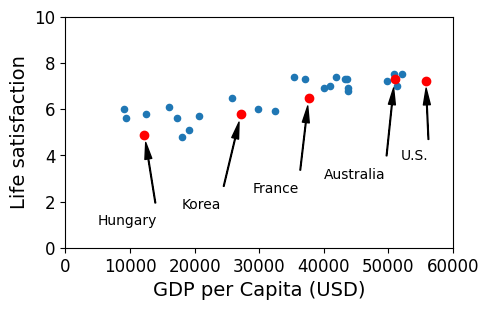

In [136]:
# 선형 관계를 잘보여주는 국가 시각화
sample_data.plot(kind='scatter', x="GDP per Capita", y='Life satisfaction', figsize=(5, 3))
plt.axis([0, 60000, 0, 10])

# 언급될 5개 국가명 명기 좌표
position_text = {
    "Hungary" : (5000, 1),
    "Korea" : (18000, 1.7),
    "France" : (29000, 2.4),
    "Australia" : (40000, 3.0),
    "United States" : (52000, 3.8),
}

# 5개 국가 좌표 표기
for country, pos_text in position_text.items():
    pos_data_x, pos_data_y = sample_data.loc[country]
    print(pos_data_y)
    # 5개 국가명 표기
    country = "U.S." if country == "United States" else country
    # plt.annotate : plot에 주석을 위한 메서드 
    plt.annotate(country, xy=(pos_data_x, pos_data_y), xytext=pos_text,
                 arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))
    
    # 5개 국가 산점도 그리기
    plt.plot(pos_data_x, pos_data_y, "ro")

plt.xlabel("GDP per Capita (USD)")

plt.show()

In [138]:
sample_data.loc[list(position_text.keys())]

,GDP per Capita,Life satisfaction
Country,,
Hungary,12239.894,4.9
Korea,27195.197,5.8
France,37675.006,6.5
Australia,50961.865,7.3
United States,55805.204,7.2


Text(5000, 2.6, '$\\theta_1 = 5 \\times 10^{-5}$')

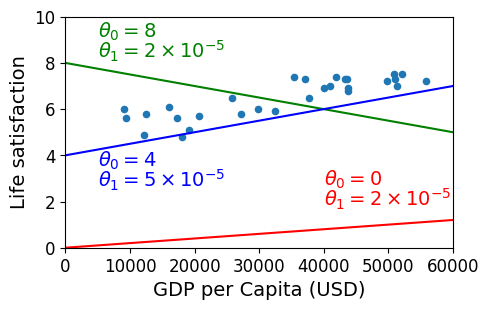

In [141]:
sample_data.plot(kind='scatter', x='GDP per Capita', y='Life satisfaction', figsize=(5, 3))
plt.xlabel("GDP per Capita (USD)")
plt.axis([0, 60000, 0, 10])

# 직선 그리기
X = np.linspace(0, 60000, 100)

# 빨강 직선
plt.plot(X, 2 * X / 100000, "r")
plt.text(40000, 2.7, r"$\theta_0 = 0$", fontsize=14, color="r")
plt.text(40000, 1.8, r"$\theta_1 = 2 \times 10^{-5}$", fontsize=14, color="r")

# 초록 직선
plt.plot(X, 8 - 5 * X / 100000, "g")
plt.text(5000, 9.1, r"$\theta_0 = 8$", fontsize=14, color="g")
plt.text(5000, 8.2, r"$\theta_1 = 2 \times 10^{-5}$", fontsize=14, color="g")

# 파랑 직선
plt.plot(X, 4 + 5 * X / 100000, "b")
plt.text(5000, 3.5, r"$\theta_0 = 4$", fontsize=14, color="b")
plt.text(5000, 2.6, r"$\theta_1 = 5 \times 10^{-5}$", fontsize=14, color="b")

In [142]:
from sklearn import linear_model

lin1 = linear_model.LinearRegression()

In [149]:
# 1차원 배열을 열로 세로로 붙여서 2차원으로 표현
Xsample = np.c_[sample_data["GDP per Capita"]]
ysample = np.c_[sample_data["Life satisfaction"]]

In [154]:
sample_data["GDP per Capita"].shape

(29,)

In [202]:
print(Xsample.shape)
print(Xsample)

(29, 1)
[[ 9054.914]
 [ 9437.372]
 [12239.894]
 [12495.334]
 [15991.736]
 [17288.083]
 [18064.288]
 [19121.592]
 [20732.482]
 [25864.721]
 [27195.197]
 [29866.581]
 [32485.545]
 [35343.336]
 [37044.891]
 [37675.006]
 [40106.632]
 [40996.511]
 [41973.988]
 [43331.961]
 [43603.115]
 [43724.031]
 [43770.688]
 [49866.266]
 [50854.583]
 [50961.865]
 [51350.744]
 [52114.165]
 [55805.204]]


In [203]:
lin1.fit(Xsample, ysample)

LinearRegression()

In [204]:
t0, t1 = lin1.intercept_[0], lin1.coef_[0][0]

print(f"절편: \t {t0}t1")
print(f"기울기:\t {t1}t1")

절편: 	 4.853052800266435t1
기울기:	 4.911544589158486e-05t1


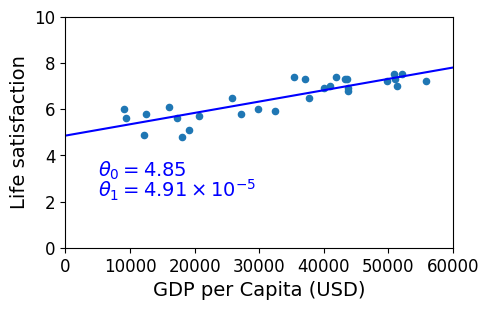

In [205]:
# 산점도
sample_data.plot(kind='scatter', x="GDP per Capita", y="Life satisfaction", figsize=(5, 3))
plt.xlabel("GDP per Capita (USD)")
plt.axis([0, 60000, 0, 10])

# 직선 그리기
X = np.linspace(0, 60000, 100)
plt.plot(X, t0 + t1 * X, "b")

# 직선의 절편과 기울기 정보 명시
plt.text(5000, 3.1, r"$\theta_0 = 4.85$", fontsize=14, color="b")
plt.text(5000, 2.2, r"$\theta_1 = 4.91 \times 10^{-5}$", fontsize=14, color="b")

plt.show()

In [206]:
missing_data

,GDP per Capita,Life satisfaction
Country,,
Brazil,8669.998,7.0
Mexico,9009.280,6.7
Chile,13340.905,6.7
Czech Republic,17256.918,6.5
Norway,74822.106,7.4
Switzerland,80675.308,7.5
Luxembourg,101994.093,6.9


In [159]:
position_text2 = {
    "Brazil": (1000, 9.0),
    "Mexico": (11000, 9.0),
    "Chile": (25000, 9.0),
    "Czech Republic": (35000, 9.0),
    "Norway": (60000, 3),
    "Switzerland": (72000, 3.0),
    "Luxembourg": (90000, 3.0),
}

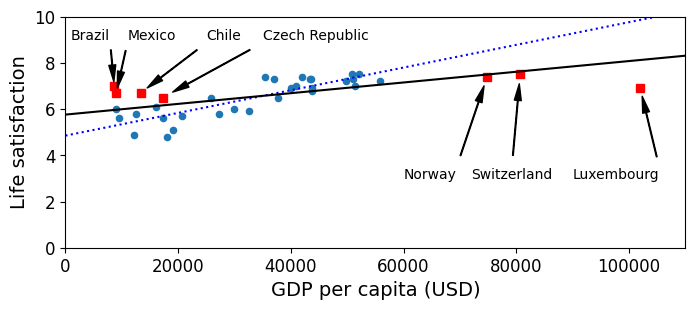

In [207]:
# 7개 국가를 제외한 국가들의 산점도 (파랑색 점)
sample_data.plot(kind='scatter', x="GDP per Capita", y='Life satisfaction', figsize=(8,3))
plt.axis([0, 110000, 0, 10])

# 7개 국가 산점도(빨강 점)
for country, pos_text in position_text2.items():
    pos_data_x, pos_data_y = missing_data.loc[country]
    # 7개 국가명 표기
    plt.annotate(country, xy=(pos_data_x, pos_data_y), xytext=pos_text,
            arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "rs")

# 7개 국가 제외 예측 선형 모델 그래프 (파랑 점선)
X=np.linspace(0, 110000, 1000)
plt.plot(X, t0 + t1*X, "b:")

# 7개 국가 포함 선형회귀 모델 훈련 및 예측
lin_reg_full = linear_model.LinearRegression()
Xfull = np.c_[oecd_country_stats["GDP per Capita"]]
yfull = np.c_[oecd_country_stats["Life satisfaction"]]
lin_reg_full.fit(Xfull, yfull)

# 7개 국가 포함 예측 선형 모델 그래프(검정 실선)
t0full, t1full = lin_reg_full.intercept_[0], lin_reg_full.coef_[0][0]
X = np.linspace(0, 110000, 1000)
plt.plot(X, t0full + t1full * X, "k")
plt.xlabel("GDP per capita (USD)")

plt.show()

In [ ]:
# 7개 국가 포함 선형회귀 모델 훈련 및 예측
lin_reg_full = linear_model.LinearRegression()
Xfull = np.c_[oecd_country_stats["GDP per Capita"]]
yfull = np.c_[oecd_country_stats["Life satisfaction"]]
lin_reg_full.fit(Xfull, yfull)

In [209]:
Xfull = np.c_[oecd_country_stats["GDP per Capita"]]
yfull = np.c_[oecd_country_stats["Life satisfaction"]]

/Users/kjs/miniconda3/envs/handson_ml/lib/python3.10/site-packages/sklearn/utils/extmath.py:1069: RuntimeWarning: overflow encountered in square
  temp **= 2
/Users/kjs/miniconda3/envs/handson_ml/lib/python3.10/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/kjs/miniconda3/envs/handson_ml/lib/python3.10/site-packages/sklearn/utils/extmath.py:1075: RuntimeWarning: overflow encountered in square
  new_unnormalized_variance -= correction**2 / new_sample_count
/Users/kjs/miniconda3/envs/handson_ml/lib/python3.10/site-packages/sklearn/utils/extmath.py:1075: RuntimeWarning: invalid value encountered in subtract
  new_unnormalized_variance -= correction**2 / new_sample_count
/Users/kjs/miniconda3/envs/handson_ml/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:83: RuntimeWarning: overflow encountered in square
  upper_bound = n_samples * eps * var + (n_samples * mean * eps) 

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

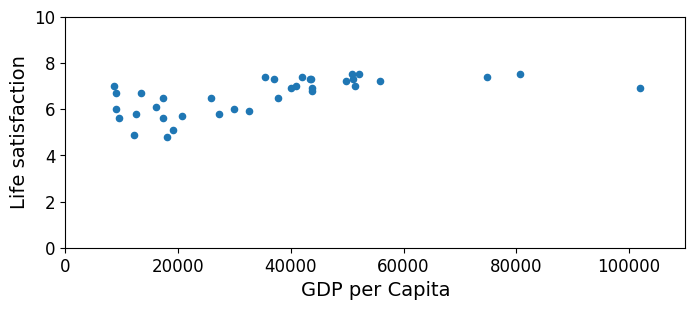

In [210]:
oecd_country_stats.plot(kind='scatter', x='GDP per Capita', y='Life satisfaction', figsize=(8, 3))
plt.axis([0, 110000, 0, 10])

from sklearn import preprocessing
from sklearn import pipeline

# 다항회귀
poly = preprocessing.PolynomialFeatures(degree=60, include_bias=False)
# 정규분포 스케일러
scaler = preprocessing.StandardScaler()
# 선형회귀
lin_reg2 = linear_model.LinearRegression()

pipeline_reg = pipeline.Pipeline([('poly', poly), ('scal', scaler), ('lin', lin_reg2)])
# print(Xfull)
pipeline_reg.fit(Xfull, yfull)
# np.newaxis : np 행렬의 차원을 확장하는 함수
curve = pipeline_reg.predict(X[:, np.newaxis])

plt.plot(X, curve)
plt.xlabel("GDP per capita (USD)")
save_fig('overfitting_model_plot')
plt.show()

In [211]:
oecd_country_stats.loc[[c for c in oecd_country_stats.index if "W" in c.upper()]]["Life satisfaction"]

Country
New Zealand    7.3
Sweden         7.2
Norway         7.4
Switzerland    7.5
Name: Life satisfaction, dtype: float64

In [212]:
gdp_per_capita.loc[[c for c in gdp_per_capita.index if "W" in c.upper()]].head()

,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per Capita,Estimates Start After
Country,,,,,,
Botswana,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",6040.957,2008.0
Kuwait,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",29363.027,2014.0
Malawi,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",354.275,2011.0
New Zealand,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",37044.891,2015.0
Norway,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",74822.106,2015.0


Saving Figure ridge_model_plot


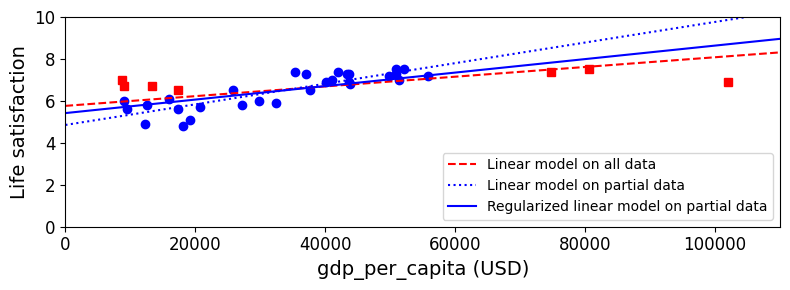

In [213]:
plt.figure(figsize=(8, 3))

plt.xlabel("GDP per Capita")
plt.ylabel("Life satisfaction")

# 7개 국가 제외 데이터 산점도
plt.plot(list(sample_data["GDP per Capita"]), list(sample_data["Life satisfaction"]), "bo")
# 제외 국가 산점도
plt.plot(list(missing_data["GDP per Capita"]), list(missing_data["Life satisfaction"]), "rs")

# 7개 국가 포함 예측 선형 모델 그래프
X = np.linspace(0, 110000, 1000)
plt.plot(X, t0full + t1full * X, "r--", label="Linear model on all data")
# 7개 국가 제외 예측 선형 모델 그래프
plt.plot(X, t0 + t1*X, "b:", label="Linear model on partial data")

# 릿지(Ridge) 규제 적용 훈련 : 7개 국가 제외 데이터 대상
ridge = linear_model.Ridge(alpha=10**9.5)
Xsample = np.c_[sample_data["GDP per Capita"]]
ysample = np.c_[sample_data["Life satisfaction"]]
ridge.fit(Xsample, ysample)
# 릿지 규제 적용 예측 선형 모델 그래프
t0ridge, t1ridge = ridge.intercept_[0], ridge.coef_[0][0]
plt.plot(X, t0ridge + t1ridge * X, "b", label="Regularized linear model on partial data")

plt.legend(loc='lower right')
plt.axis([0, 110000, 0, 10])
plt.xlabel("gdp_per_capita (USD)")
save_fig('ridge_model_plot')
plt.show()

In [214]:
sample_data[7:10]

,GDP per Capita,Life satisfaction
Country,,
Portugal,19121.592,5.1
Slovenia,20732.482,5.7
Spain,25864.721,6.5


In [215]:
(5.1 + 5.7 + 6.5) / 3

5.766666666666667

In [216]:
import sklearn.neighbors
model = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)

In [218]:
X = np.c_[sample_data["GDP per Capita"]]
y = np.c_[sample_data["Life satisfaction"]]

# 모델 훈련
model.fit(X, y)

# 키프러스 국가에 대한 예측하기
X_new = np.array([[22587.0]])
print(model.predict(X_new))

[[5.76666667]]
